<a href="https://colab.research.google.com/github/yogi753/Air-Sense/blob/main/Proposed_rnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For data reading | manipulation :
import pandas as pd

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9,5]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler

# To check the accuracy of model :
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import Statsmodels :
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Read the data :
AQI_city_hour = pd.read_csv('city_hour.csv')


# Print the first five observations to see the data structure :
AQI_city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
# Checking shape and data types of the data :

AQI_city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
# Summary Statistics of the numeric data :

AQI_city_hour.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


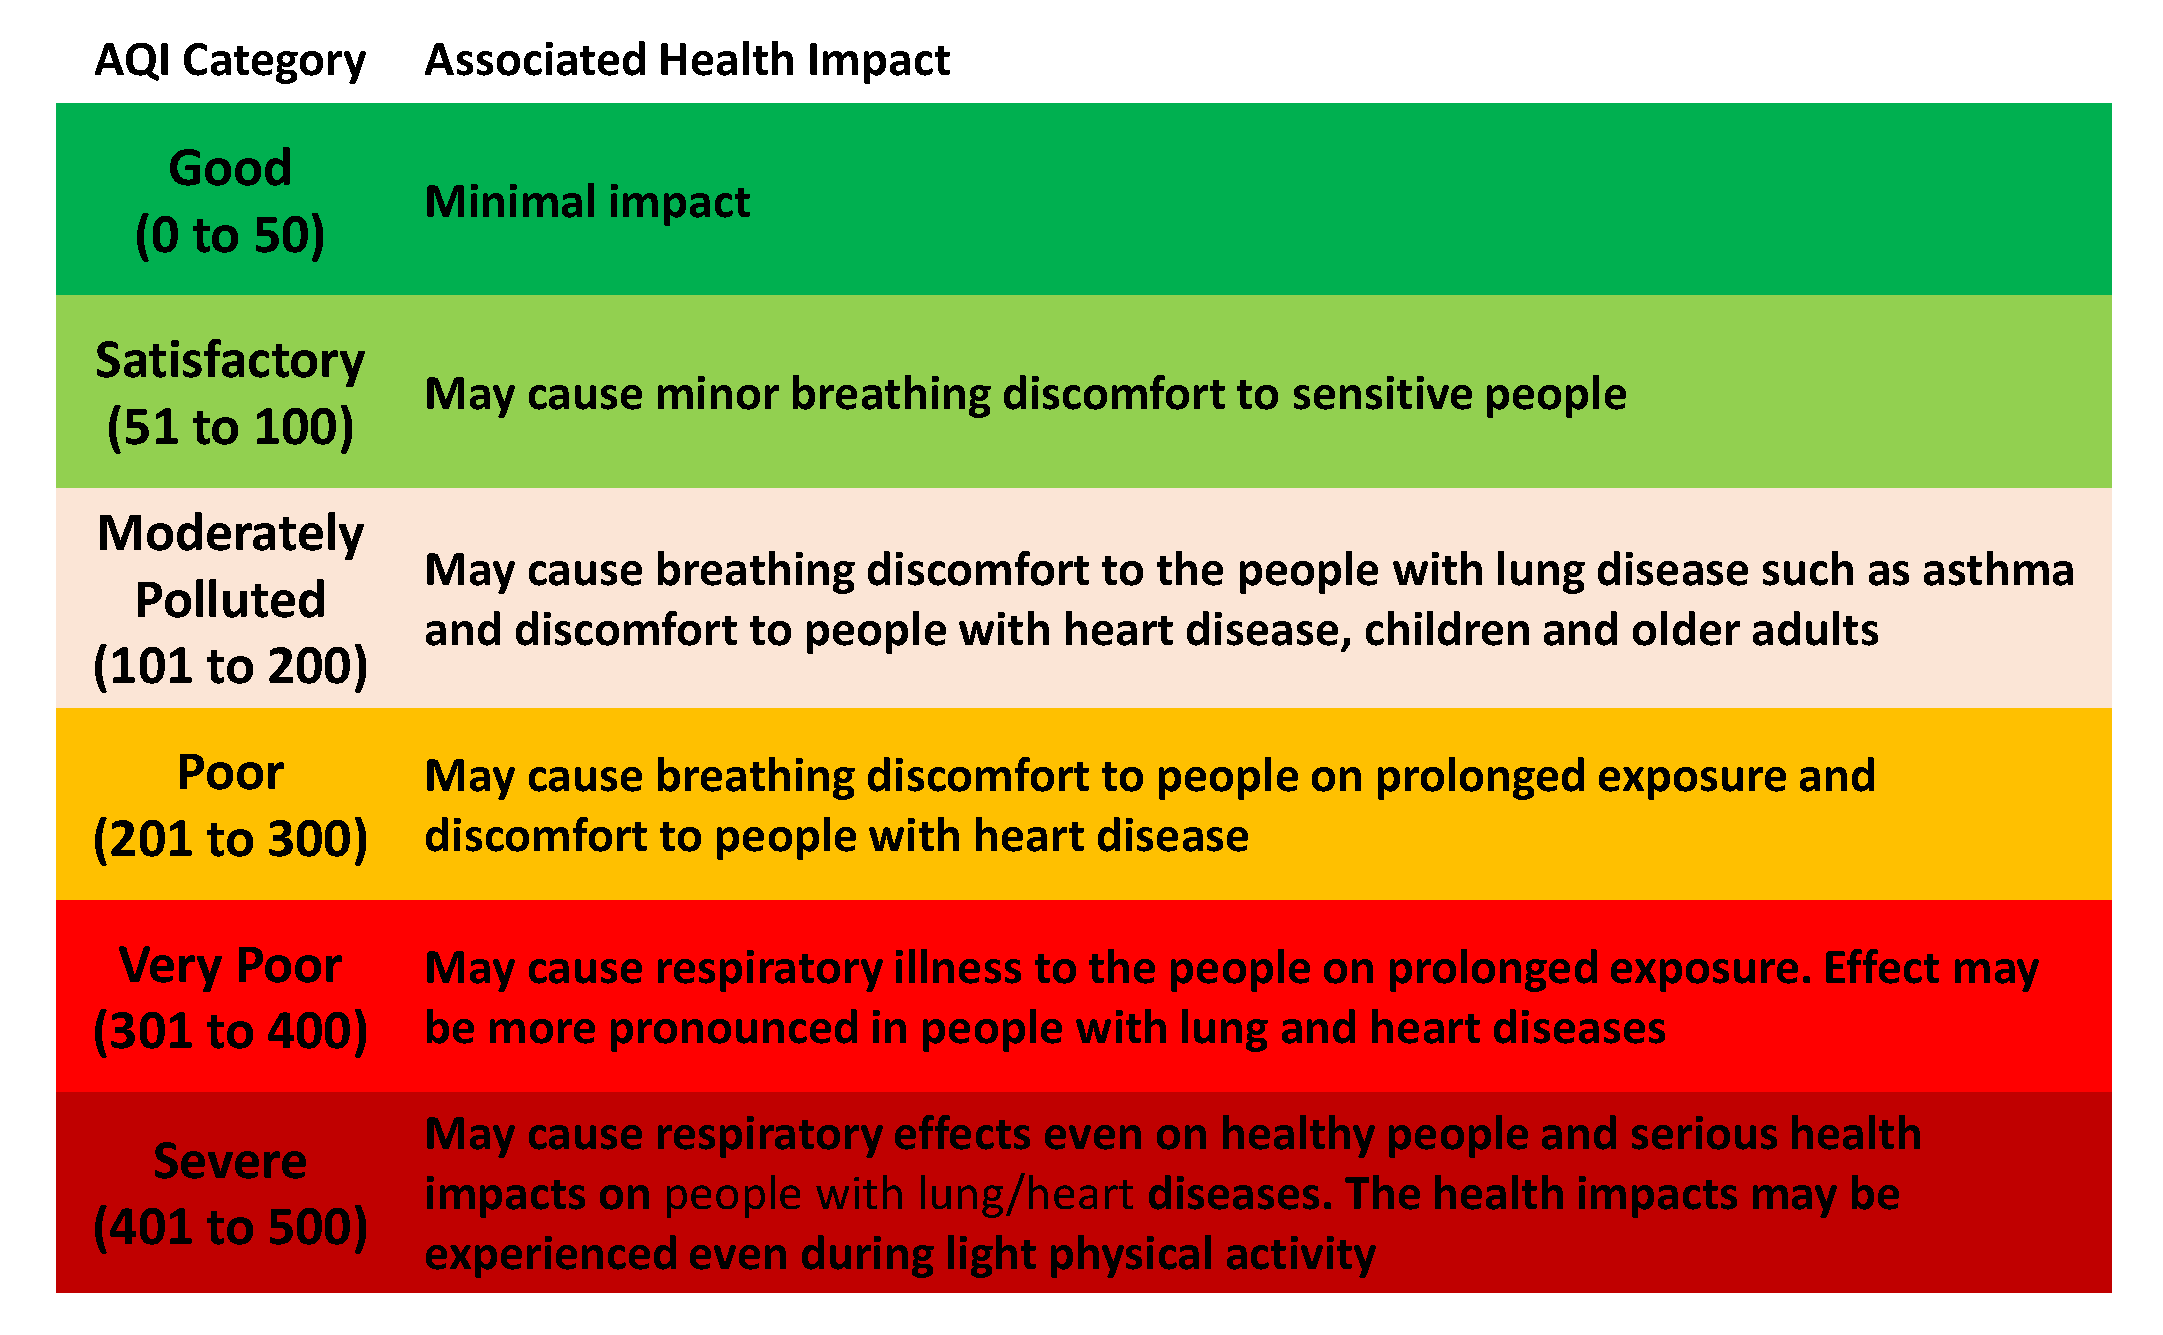

In [ ]:
from IPython import display
display.Image("http://www.indiatogether.org/uploads/picture/image/2590/IT_airquality.png",width=700)

In [ ]:
# Checking for the missing values and its precentage :

values = AQI_city_hour.isnull().sum()
percentage = 100*AQI_city_hour.isnull().sum()/len(AQI_city_hour)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('OrRd')

,No of missing values,Percent of missing values
Xylene,455829,64.390000
PM10,296737,41.920000
NH3,272542,38.500000
Toluene,220607,31.160000
Benzene,163646,23.120000
PM2.5,145088,20.500000
SO2,130373,18.420000
O3,129208,18.250000
AQI,129080,18.230000
AQI_Bucket,129080,18.230000


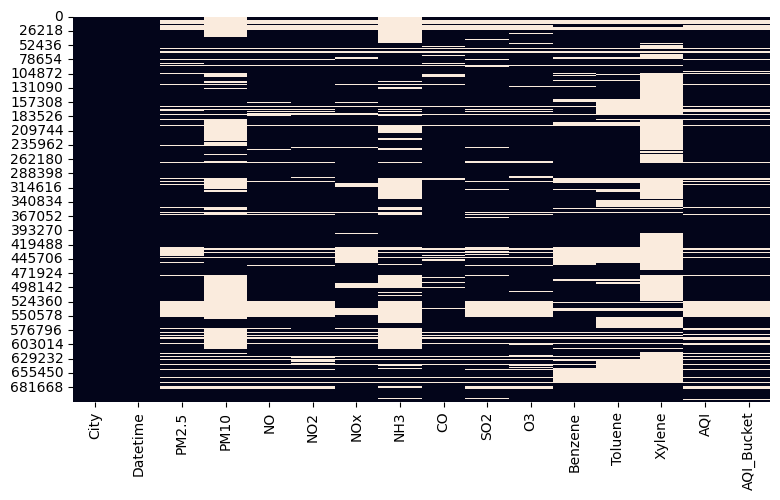

In [ ]:
# Check the missing values with heatmap :

sns.heatmap(AQI_city_hour.isnull(), cbar=False)
plt.show()

In [ ]:
# Try methods to impute missing values :

AQI_city_hour.groupby(['City', 'Datetime'])['AQI'].mean()

City           Datetime           
Ahmedabad      2015-01-01 01:00:00     NaN
               2015-01-01 02:00:00     NaN
               2015-01-01 03:00:00     NaN
               2015-01-01 04:00:00     NaN
               2015-01-01 05:00:00     NaN
                                      ... 
Visakhapatnam  2020-06-30 20:00:00    51.0
               2020-06-30 21:00:00    51.0
               2020-06-30 22:00:00    50.0
               2020-06-30 23:00:00    50.0
               2020-07-01 00:00:00    50.0
Name: AQI, Length: 707875, dtype: float64

In [ ]:
# Converting Datetime variable into datetime data type :

AQI_city_hour['Datetime'] = AQI_city_hour['Datetime'].apply(pd.to_datetime)

In [ ]:
# Check whether it is converted or not :

AQI_city_hour.dtypes

City                  object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

In [ ]:
# Impute the missing values by grouping city with and average of 5 days:

data_fill = AQI_city_hour.iloc[:, :15].fillna(AQI_city_hour.iloc[:, :15].groupby(['City', pd.Grouper(key='Datetime', freq='5D')]).transform('mean'))

In [ ]:
# After inputing missing values by day checking for the missing values :

values = data_fill.isnull().sum()
percentage = 100*data_fill.isnull().sum()/len(data_fill)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('Purples')

,No of missing values,Percent of missing values
Xylene,422300,59.660000
PM10,251761,35.570000
NH3,233646,33.010000
Toluene,177177,25.030000
Benzene,117080,16.540000
PM2.5,95633,13.510000
NOx,88689,12.530000
AQI,87714,12.390000
O3,76756,10.840000
SO2,73152,10.330000


In [ ]:
# Impute the missing values by grouping city and month :

data_fill = data_fill.fillna(data_fill.groupby(['City', pd.Grouper(key='Datetime', freq='M')]).transform('mean'))

In [ ]:
# After inputing missing values by month check for the missing values :

values = data_fill.isnull().sum()
percentage = 100*data_fill.isnull().sum()/len(data_fill)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('Blues')

,No of missing values,Percent of missing values
Xylene,408260,57.670000
PM10,229569,32.430000
NH3,213446,30.150000
Toluene,161505,22.820000
Benzene,95752,13.530000
PM2.5,73490,10.380000
NOx,71934,10.160000
AQI,62217,8.790000
O3,50652,7.160000
NO2,49304,6.970000


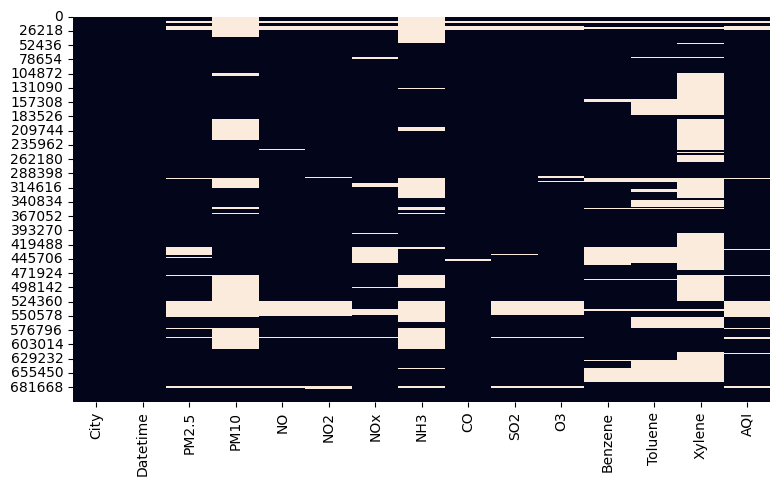

In [ ]:
sns.heatmap(data_fill.isnull(), cbar=False)
plt.show()

In [ ]:
# Imputing missing values by beckward fill :

data_fill = data_fill.fillna(method = 'bfill',axis=0)

In [ ]:
#Still data is missing in the columns, hence using forward fill to impute this :

data_fill = data_fill.fillna(method = 'ffill',axis=0)

In [ ]:
# After inputing missing values by bfill abd ffill:

values = data_fill.isnull().sum()
percentage = 100*data_fill.isnull().sum()/len(data_fill)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('Blues')

,No of missing values,Percent of missing values


In [ ]:
# After imputing missing values, check summary statistics of the data :

data_fill.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000
mean,67.386893,118.578434,21.481073,27.211302,34.774738,23.787998,3.259522,18.676132,33.270699,3.588802,7.988411,4.461357,168.198778
std,72.276314,100.615182,35.795178,28.053624,39.253794,25.237833,14.006621,26.624725,28.170868,16.905402,20.055663,6.974015,157.552910
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,25.498000,55.750000,4.180000,9.630000,11.670000,8.080000,0.420000,5.050000,14.490000,0.050000,0.340000,0.100000,81.922700
50%,45.740000,86.000000,8.760000,19.140000,23.240000,18.090000,0.830000,8.880000,24.800000,1.080000,2.320000,1.600000,116.500000
75%,83.050000,149.640000,19.890000,34.560000,42.290000,35.450000,1.500000,17.570000,44.290000,3.920000,9.190000,6.090000,218.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


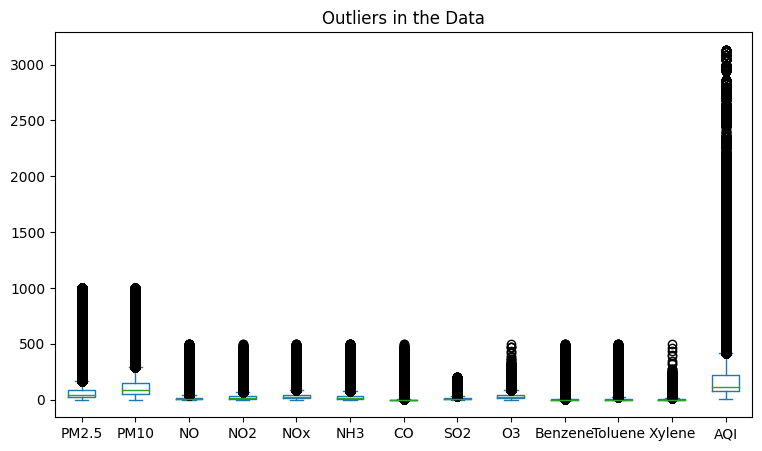

<Figure size 900x500 with 0 Axes>

In [ ]:
# Checking for outliers :

data_fill.plot(kind='box')
plt.title("Outliers in the Data")
plt.show()
plt.savefig('Outliers.png', dpi=300, bbox_inches='tight')

In [ ]:
# In this we are not concidering the AQI_Bucket column, because it is not nessasary for our analysis.
# Here, we do analysis on all over country, so Aggregating the data into month wise and creating the new dataframe.

AQI_df = data_fill.groupby(['City', (data_fill.Datetime.dt.strftime('%Y-%m'))]).mean()

# Reset index :
AQI_df = AQI_df.reset_index()

# Check the First 5 observation :
AQI_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01,82.895833,137.429822,22.507038,27.030412,39.585462,19.88,22.507038,45.149166,46.578152,1.469680,2.547714,2.977880,320.985577
1,Ahmedabad,2015-02,109.703239,137.429822,19.690032,29.282138,47.106372,19.88,19.690032,59.624493,48.993327,8.069926,21.536881,7.021348,496.074405
2,Ahmedabad,2015-03,109.205160,137.429822,13.956715,28.000604,41.035880,19.88,13.956715,57.189125,45.858677,10.505060,27.147715,4.000328,413.652330
3,Ahmedabad,2015-04,100.724662,137.429822,7.475383,20.798432,27.264574,19.88,7.475383,51.098751,30.500948,3.140573,8.401001,4.501038,300.600569
4,Ahmedabad,2015-05,76.214918,137.429822,8.513048,17.533370,24.813104,19.88,8.513048,35.914560,31.429479,3.745080,11.201914,5.123026,250.872653


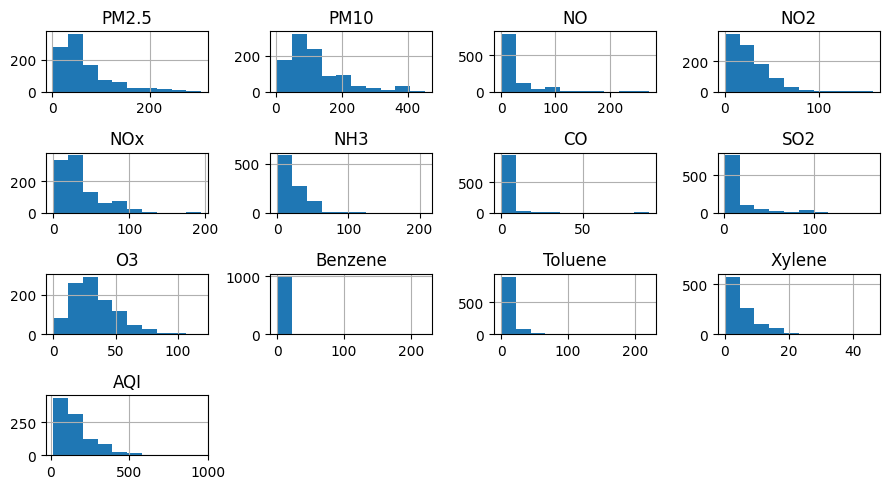

Skewness :
 PM2.5       1.763624
PM10        1.527524
NO          3.184801
NO2         1.905857
NOx         1.504361
NH3         2.870430
CO          6.705676
SO2         2.766052
O3          0.983101
Benzene    13.817042
Toluene     6.049608
Xylene      1.677739
AQI         2.099102
dtype: float64


<Figure size 900x500 with 0 Axes>

In [ ]:
# Check the distribution of the all numerical columns and print skewness of the data :

AQI_df.drop(['City', 'Datetime'], axis=1).hist()
plt.tight_layout()
plt.title("Distribution of Data")
plt.show()
plt.savefig('Distribution of data.png')
# Print the skewness of the data :
print('Skewness :\n', AQI_df.drop(['City', 'Datetime'], axis=1).skew())

The impact of  PM2.5 on AQI


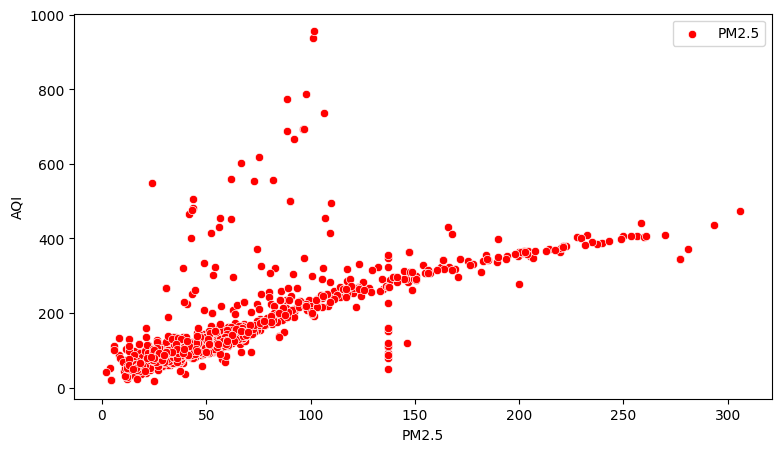

The impact of  PM10 on AQI


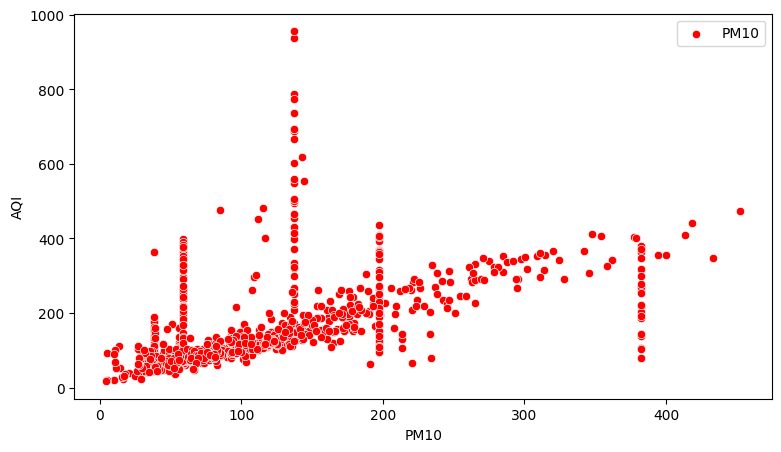

The impact of  NO on AQI


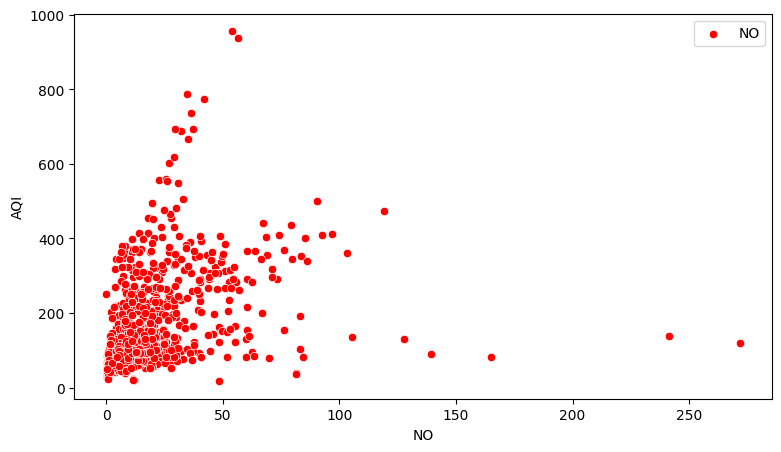

The impact of  NO2 on AQI


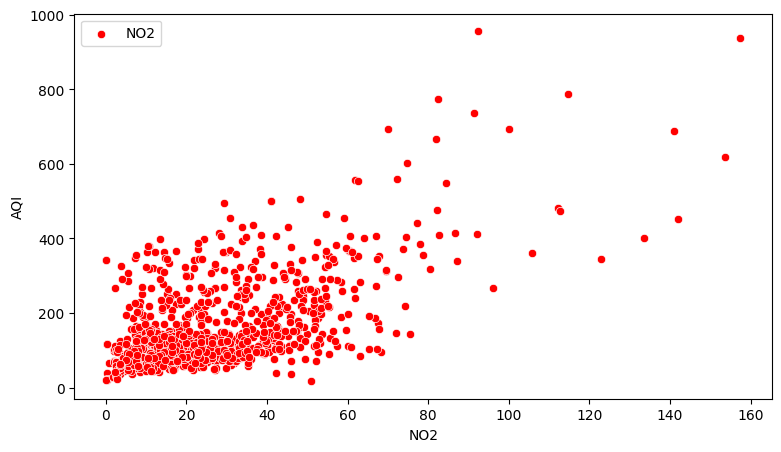

The impact of  NOx on AQI


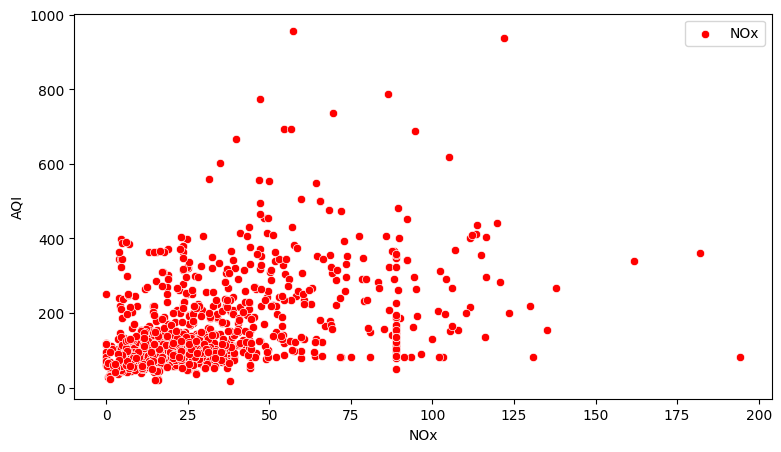

The impact of  NH3 on AQI


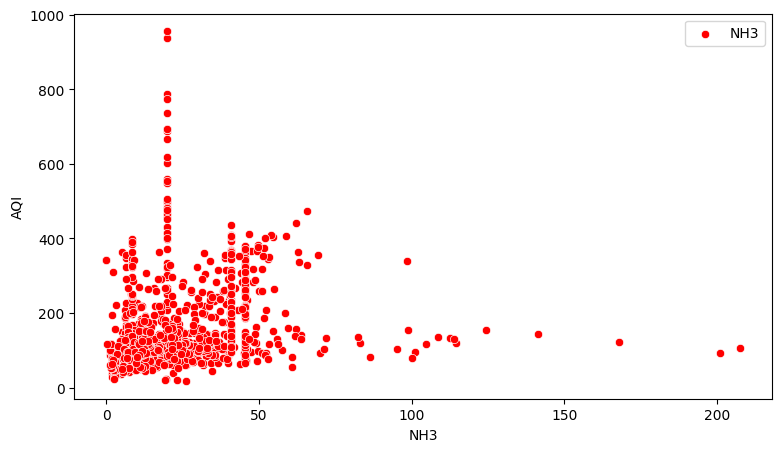

The impact of  CO on AQI


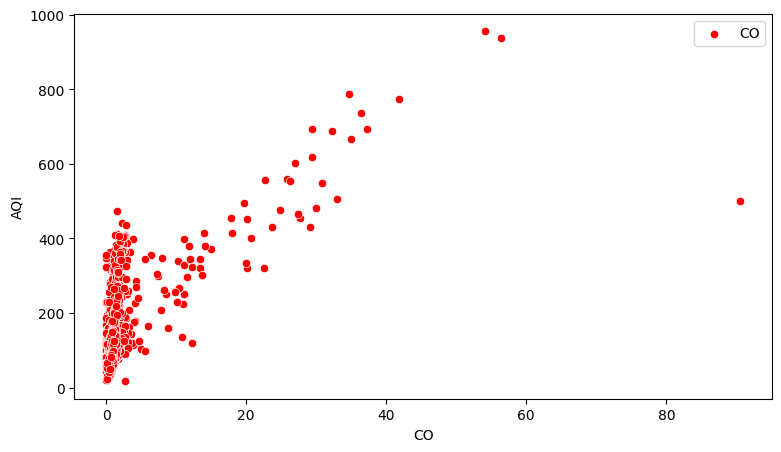

The impact of  SO2 on AQI


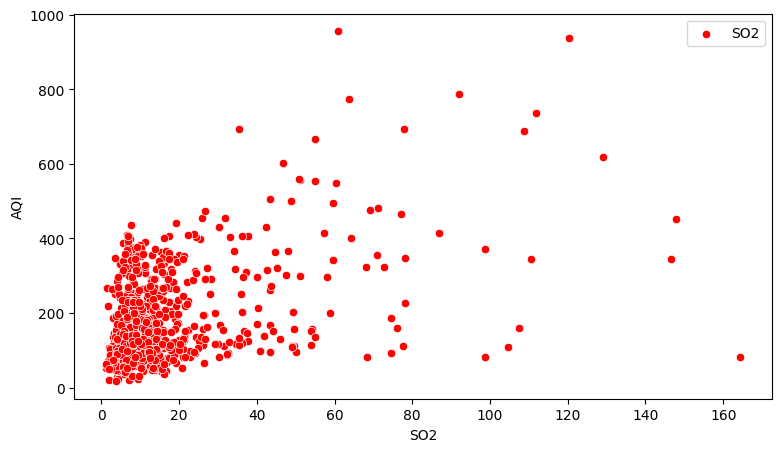

The impact of  O3 on AQI


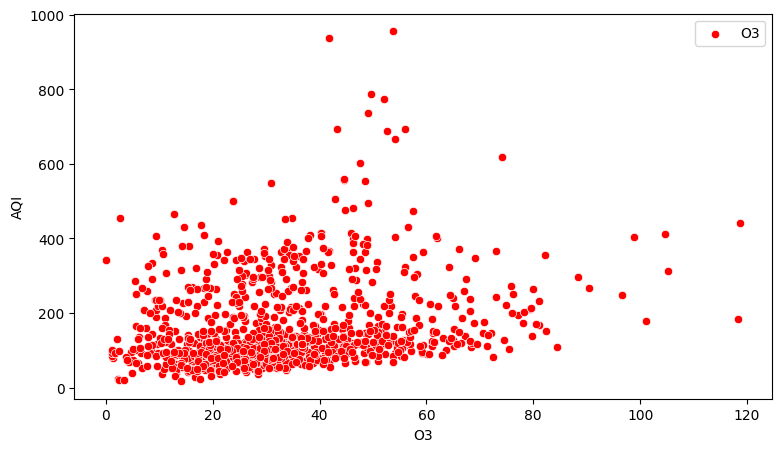

The impact of  Benzene on AQI


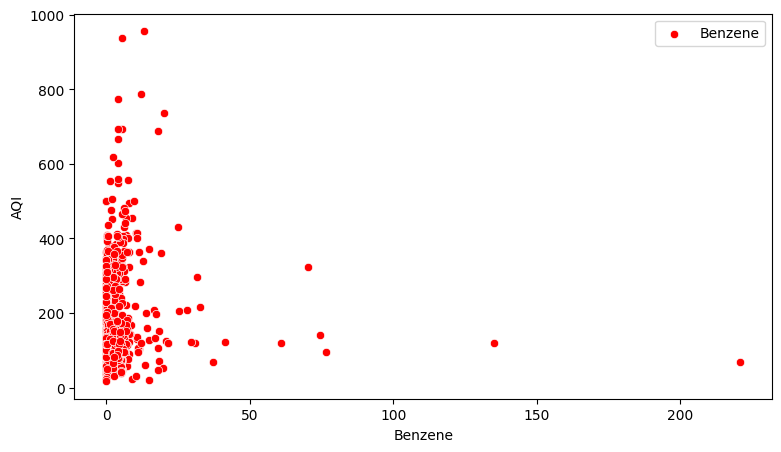

The impact of  Toluene on AQI


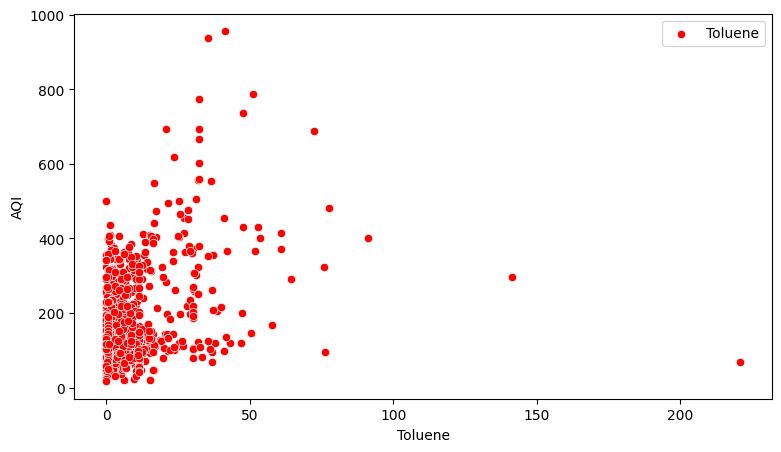

In [ ]:
# Check the effect of all pollutants on AQI :

for i in AQI_df.iloc[:, 2:13]:
    print('The impact of ', i, 'on AQI')
    sns.scatterplot(x = i, y ='AQI', data = AQI_df,marker="o",sizes=200,color="r",label=i)
    plt.legend()
    plt.show()

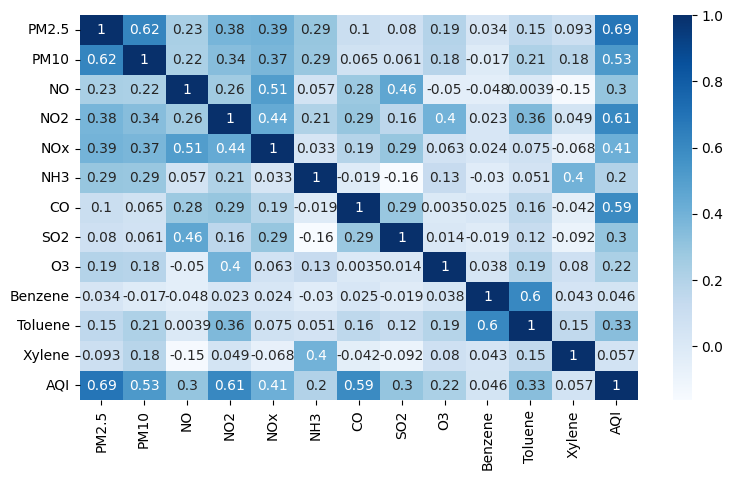

In [ ]:
# Correlation of the numerical data with heatmap :

sns.heatmap(AQI_df.corr(), annot=True, cmap='Blues')
plt.show()

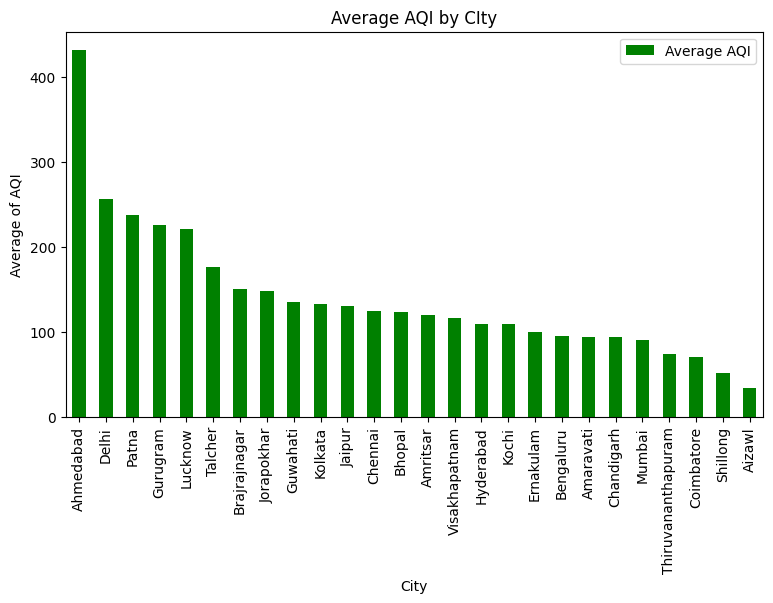

In [ ]:
# Check the citywise average of AQI :

AQI_df.groupby('City')['AQI'].mean().sort_values(ascending=False).plot(kind='bar',color="g",label="Average AQI")
plt.ylabel('Average of AQI')
plt.title("Average AQI by CIty")
plt.legend()
plt.show()

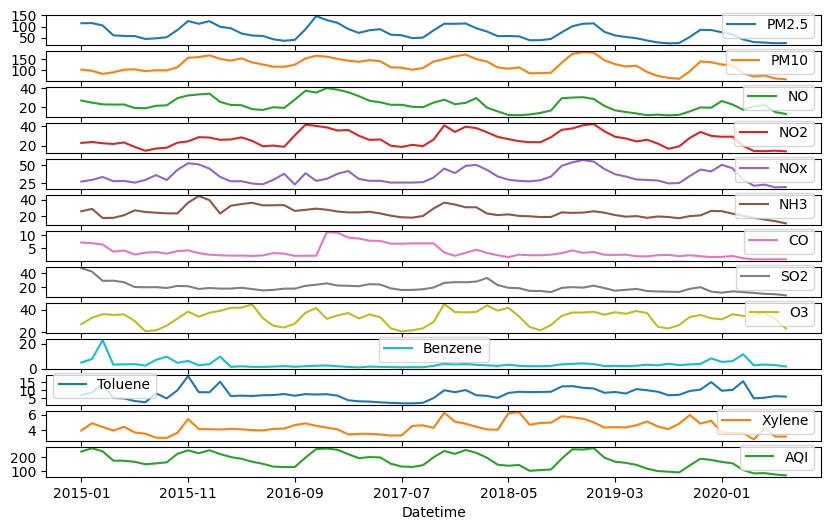

In [ ]:
# Yearly and Monthly Visualisation.

AQI_df.groupby(['Datetime']).mean().plot(kind='line', figsize=(10,6), subplots=True)

plt.show()

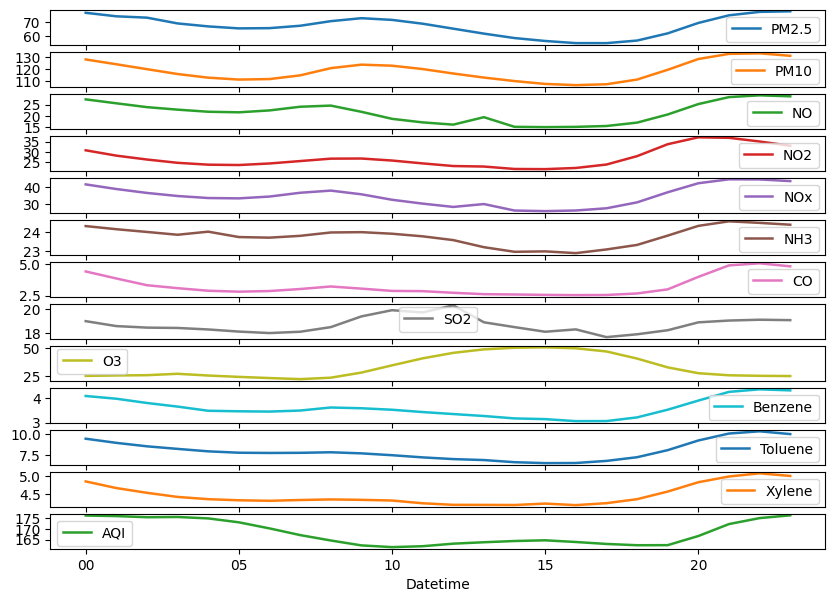

In [ ]:
# Hourly Visualisations

data_fill.groupby(data_fill.Datetime.dt.strftime('%H')).mean().plot(kind='line', figsize=(10,7), subplots=True,linewidth=1.8)
plt.show()

In [ ]:
# First seperate target and independent variables :
X = AQI_df.drop(['City', 'Datetime', 'AQI'], axis=1)
X = sm.add_constant(X)
y = AQI_df.AQI

# Fitting the model
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     407.5
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:34:48   Log-Likelihood:                -5356.7
No. Observations:                1005   AIC:                         1.074e+04
Df Residuals:                     992   BIC:                         1.080e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0874      4.320      3.492      0.001       6.609      23.566
PM2.5          1.1134      0.041     27.364      0.000       1.034       1.193
PM10           0.1600      0.026      6.229      0.000       0.110       0.210
NO            -0.3533      0.082     -4.292      0.000      -0.515      -0.192
NO2            1.2614      0.108     11.715      0.000       1.050       1.473
NOx           -0.0026      0.075     -0.034      0.973      -0.150       0.145
NH3            0.0925      0.092      1.008      0.313      -0.087       0.272
CO             5.1173      0.164     31.156      0.000       4.795       5.440
SO2            0.5513      0.080      6.877      0.000       0.394       0.709
O3            -0.0102      0.100     -0.102      0.919      -0.206       0.186
Benzene       -0.6260      0.212     -2.953      0.003      -1.042      -0.210
Toluene        0.9736      0.170      5.730      0.000       0.640       1.307
Xylene        -0.4545      0.329     -1.381      0.168      -1.100       0.191
==============================================================================
Omnibus:                      301.594   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2564.304
Skew:                           1.126   Prob(JB):                         0.00
Kurtosis:                      10.495   Cond. No.                         478.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Print significant variables which are most affect on AQI :

significant = model.pvalues[model.pvalues < 0.05].sort_values(ascending=True)

print('Significant variables which more affect on AQI :\n', significant)

Significant variables which more affect on AQI :
 CO         3.739531e-149
PM2.5      2.786849e-123
NO2         8.866718e-30
SO2         1.081402e-11
PM10        6.922222e-10
Toluene     1.334997e-08
NO          1.945753e-05
const       5.003062e-04
Benzene     3.216787e-03
dtype: float64


In [ ]:
# Import the library :
from statsmodels.tsa.stattools import adfuller

# Perform the test :
adfuller(AQI_df.AQI)

(-3.861332015277616,
 0.0023385884615780396,
 15,
 989,
 {'1%': -3.436979275944879,
  '5%': -2.8644668170148058,
  '10%': -2.5683283824496153},
 10660.987916590571)

In [ ]:
# Before this, Convert Datetime variable into Datetime data type in new dataframe AQI_df :

AQI_df['Datetime'] = AQI_df['Datetime'].apply(pd.to_datetime)

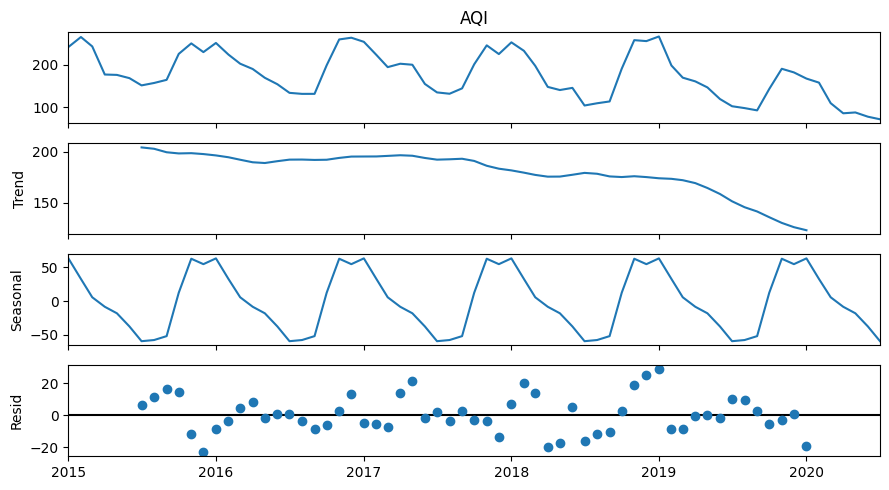

In [ ]:
# Remove city from the dataframe as it is a Categorical column :
df = AQI_df.drop('City', axis=1)

# Set Datetime as index :
df.set_index('Datetime', inplace=True)

# Do groupby Datetime for average of AQI :
df1 = df.groupby('Datetime')['AQI'].mean()

# Decompose the time series :
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

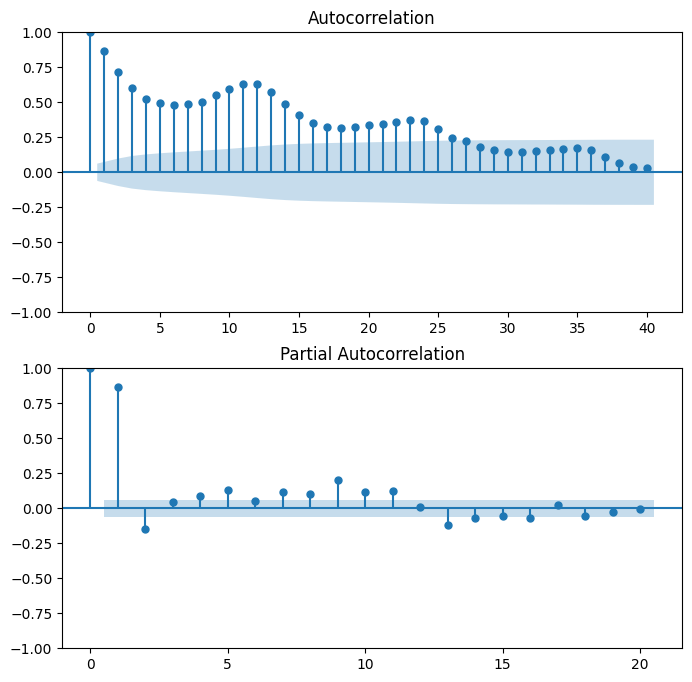

In [ ]:
# Import library ACF and PACF :
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PLot :
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df.AQI, lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.AQI, lags=20, ax=ax2)  # Reduced the number of lags to 20
plt.show()


**Define Evaluation Metrics**

RMSE,MSE,MAE,MAPE and R Square

In [ ]:
# Defining Function for Accuracy metrics
def forecast_accuracy(forecast, actual):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np

    mape = np.mean(np.abs((actual - forecast) / actual)) * 100  # MAPE
    rmse = np.sqrt(mean_squared_error(actual, forecast))  # RMSE
    mse = mean_squared_error(actual, forecast)  # MSE
    mae = mean_absolute_error(actual, forecast)  # MAE
    r2 = r2_score(actual, forecast)  # R-squared (R2)

    return {
        'mape': mape,
        'rmse': rmse,
        'mse': mse,
        'mae': mae,
        'r2': r2
    }


In [ ]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
    return mape

def VAR_accuracy(predicted, valid):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np

    for i in valid.columns:
        rmse = np.sqrt(mean_squared_error(valid[i], predicted[i]))
        mape = MAPE(valid[i].values, predicted[i])
        mse = mean_squared_error(valid[i], predicted[i])
        mae = mean_absolute_error(valid[i], predicted[i])
        r2 = r2_score(valid[i], predicted[i])

        print("Metrics for", i)
        print("RMSE:", rmse)
        print("MAPE:", mape)
        print("MSE:", mse)
        print("MAE:", mae)
        print("R-squared (R2):", r2)
        print()

In [ ]:
def VAR_AQI_MAPE(predicted, valid):
    return MAPE(valid['AQI'].values, predicted['AQI'])

def VAR_AQI_RMSE(predicted, valid):
    return np.sqrt(mean_squared_error(valid['AQI'], predicted['AQI']))

def VAR_AQI_MSE(predicted, valid):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(valid['AQI'], predicted['AQI'])

def VAR_AQI_MAE(predicted, valid):
    from sklearn.metrics import mean_absolute_error
    return mean_absolute_error(valid['AQI'], predicted['AQI'])

def VAR_AQI_R2(predicted, valid):
    from sklearn.metrics import r2_score
    return r2_score(valid['AQI'], predicted['AQI'])

In [ ]:
# Prepare the data for Analysis :   (Purpose to make simple data for Time series)

month = data_fill.groupby([pd.Grouper(key='Datetime', freq='m')]).mean()

# Reset Index
month = month.reset_index()

# Setting Index
month = month.set_index('Datetime')

# Dropping the categorical
#week = week.drop('City', axis = 1)

# Check the dimensions of the data :
print(month.shape)

month.head()

(67, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2015-01-31,115.626374,102.625129,27.333253,22.896800,27.163934,26.003885,7.386084,48.106470,26.942947,4.970383,6.664869,4.029892,243.268204
2015-02-28,115.246795,96.729602,24.822801,23.918228,29.622047,28.875746,6.994889,42.371720,32.767689,7.781326,8.386841,4.901203,264.680255
2015-03-31,104.663947,82.585133,23.014788,22.562654,33.635110,17.837997,6.502632,29.145404,35.985411,22.864278,13.938244,4.417558,242.644118
2015-04-30,60.693429,90.022767,22.770123,21.891986,27.774906,18.019438,3.683389,29.321697,35.328833,3.268097,4.967285,3.969249,176.765625
2015-05-31,57.774039,101.888356,22.889909,23.422203,28.217519,21.213410,4.154859,27.231191,35.725824,3.466907,4.659611,4.448766,175.865621


In [ ]:
#creating Train test split
train_month=month[:int(0.8*(len(month)))]
print('Train shape', train_month.shape)

valid_month=month[int(0.8*(len(month))):]
print('Test shape', valid_month.shape)

Train shape (53, 13)
Test shape (14, 13)


**BASE model ARIMA**

In [ ]:
# Fitting the model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_month.AQI,  order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                   53
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -252.096
Date:                Mon, 25 Sep 2023   AIC                            510.191
Time:                        03:38:03   BIC                            516.045
Sample:                    01-31-2015   HQIC                           512.436
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1733      0.545      0.318      0.750      -0.894       1.241
ma.L1          0.1821      0.527      0.346      0.730      -0.851       1.215
sigma2       949.3278    196.762      4.825      0.000     563.682    1334.974
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.11
Prob(Q):                              1.00   Prob(JB):                         0.58
Heteroskedasticity (H):               1.67   Skew:                             0.36
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Import the library:
from pmdarima import auto_arima

stepwise_fit = auto_arima(train_month.AQI, trace = True, suppress_warnings = True, seasonal = False)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=712.840, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=527.668, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=523.009, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=524.828, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=524.878, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=523.070, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=505.704, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=520.518, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=503.179, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=499.934, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=501.724, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=499.750, Time=0.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -241.385
Date:                Mon, 25 Sep 2023   AIC                            496.771
Time:                        03:38:34   BIC                            510.563
Sample:                    01-31-2015   HQIC                           502.074
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    107.1821     33.665      3.184      0.001      41.200     173.165
ar.L1          0.7409      0.345      2.148      0.032       0.065       1.417
ar.L2          0.3778      0.466      0.810      0.418      -0.536       1.292
ar.L3         -0.6792      0.283     -2.397      0.017      -1.235      -0.124
ma.L1          0.2827      0.725      0.390      0.697      -1.139       1.705
ma.L2         -0.6914      0.354     -1.954      0.051      -1.385       0.002
sigma2       491.6870    268.381      1.832      0.067     -34.330    1017.704
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.58   Prob(JB):                         0.87
Heteroskedasticity (H):               1.74   Skew:                            -0.06
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.9 MB/s eta 0:00:00


**SARIMAX Model ( Month wise - Univariate Analysis)**

In [ ]:
mod_month = sm.tsa.statespace.SARIMAX(train_month.AQI,
                                order=(3, 0, 2),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
result_month = mod_month.fit()
result_month.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   53
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 12)   Log Likelihood                -244.386
Date:                            Mon, 25 Sep 2023   AIC                            510.772
Time:                                    03:38:53   BIC                            532.445
Sample:                                01-31-2015   HQIC                           519.107
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9160      5.483      0.167      0.867      -9.831      11.663
ar.L2          0.9997      6.945      0.144      0.886     -12.612      14.612
ar.L3         -0.9157      1.706     -0.537      0.591      -4.259       2.427
ma.L1         -0.0013      8.054     -0.000      1.000     -15.787      15.784
ma.L2         -1.0015      0.521     -1.922      0.055      -2.023       0.020
ar.S.L12       0.3096    285.431      0.001      0.999    -559.125     559.744
ar.S.L24       0.2494    349.595      0.001      0.999    -684.945     685.444
ar.S.L36       0.2693     54.837      0.005      0.996    -107.209     107.748
ma.S.L12       0.0511    285.965      0.000      1.000    -560.430     560.532
ma.S.L24      -0.0398    267.125     -0.000      1.000    -523.595     523.515
sigma2       628.6582      0.525   1198.463      0.000     627.630     629.686
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.58   Prob(JB):                         0.77
Heteroskedasticity (H):               0.90   Skew:                             0.02
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+22. Standard errors may be unstable.
"""

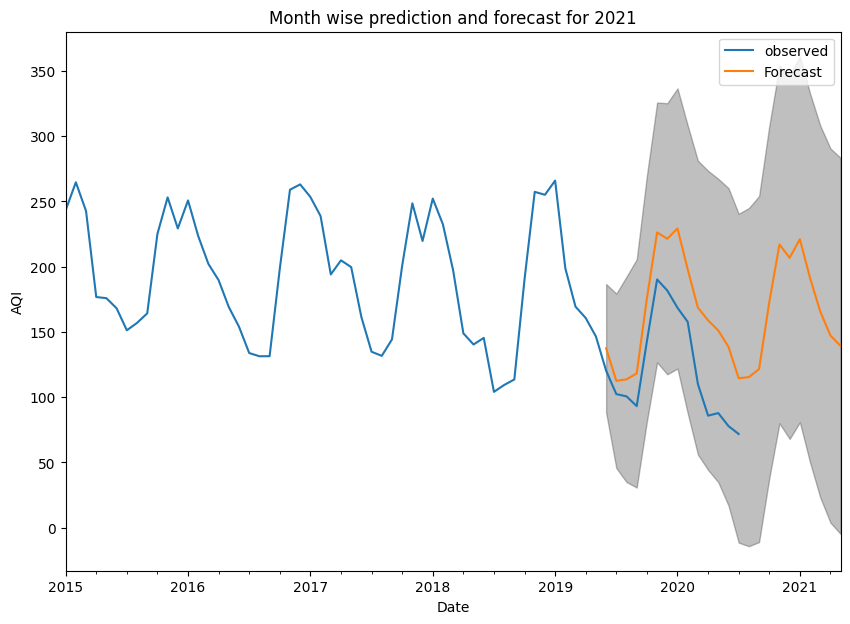

In [ ]:
## Forecast for valid set and Future

pred_uc_month = result_month.get_forecast(steps=24)
pred_ci = pred_uc_month.conf_int()
ax = month.AQI.plot(label='observed', figsize=(10, 7))
pred_uc_month.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Month wise prediction and forecast for 2021")
plt.legend()
plt.show()


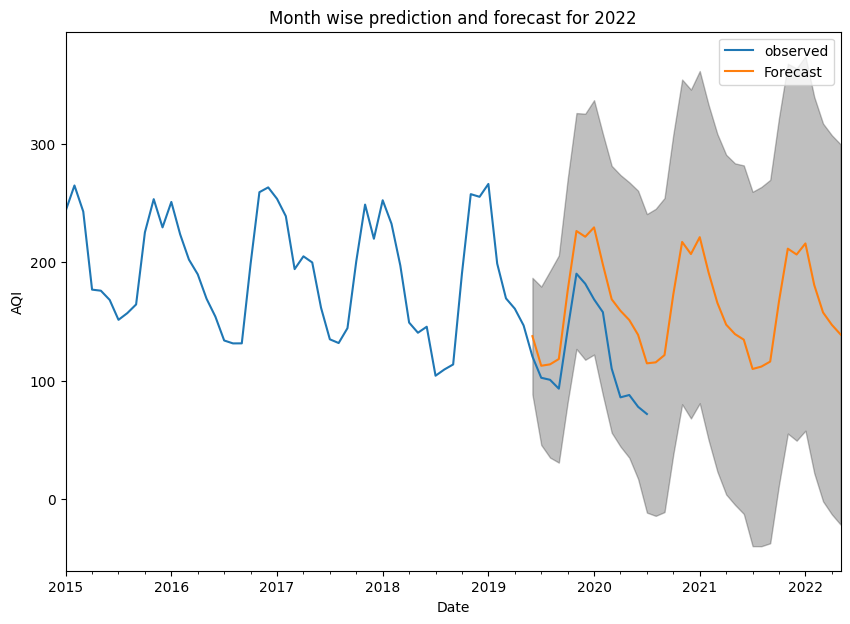

In [ ]:
# Forecast for valid set and future up to 2022
pred_uc_month = result_month.get_forecast(steps=36)  # Adjust the number of steps to cover 12 months of 2022
pred_ci = pred_uc_month.conf_int()
ax = month.AQI.plot(label='observed', figsize=(10, 7))
pred_uc_month.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Month wise prediction and forecast for 2022")
plt.legend()
plt.show()


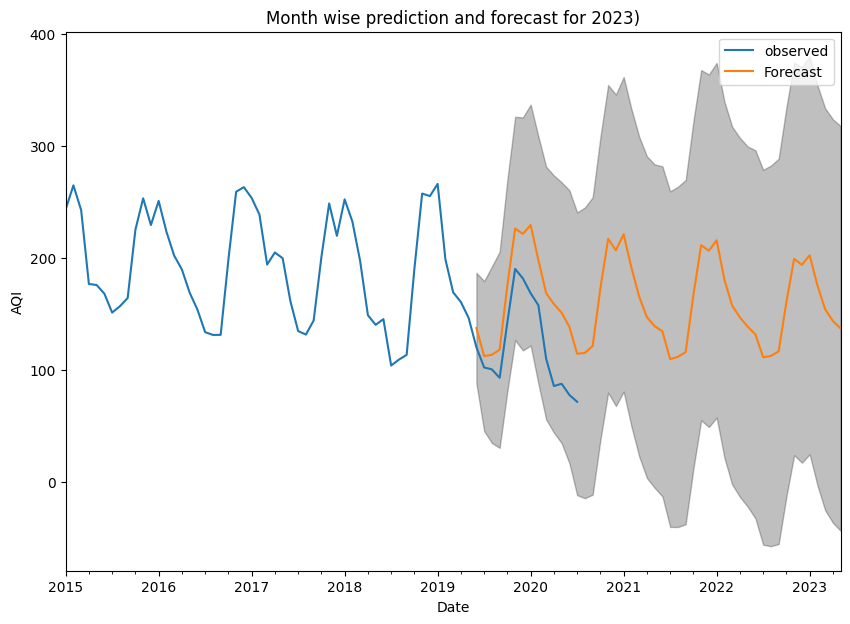

In [ ]:
# Forecast for valid set and future up to 2023
# You can specify the number of steps you need to cover until 2023
# For example, if you want to forecast up to December 2023 (24 months), set steps=24*2 = 48

pred_uc_month = result_month.get_forecast(steps=48)  # Adjust the number of steps as needed
pred_ci = pred_uc_month.conf_int()
ax = month.AQI.plot(label='observed', figsize=(10, 7))
pred_uc_month.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Month wise prediction and forecast for 2023)")
plt.legend()
plt.show()


In [ ]:
# Calculate Accuracy Metrics

forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)

{'mape': 38.366100367567235,
 'rmse': 45.30709793534671,
 'mse': 2052.7331233230984,
 'mae': 40.94595754920389,
 'r2': -0.3788897214709095}

**Vector Auto Regression (month wise - multivariate)**

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fitting the VAR model
VAR_model_month=VAR(endog=train_month)
VAR_model_month_fit=VAR_model_month.fit()

# Predicting on Validation set
predict_month=VAR_model_month_fit.forecast(VAR_model_month_fit.endog,steps=len(valid_month))

pred_month=pd.DataFrame(predict_month,columns=df.columns,index=range(0,len(predict_month)))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
VAR_accuracy(pred_month, valid_month)

Metrics for PM2.5
RMSE: 29.20915866725727
MAPE: 78.16763267561464
MSE: 853.1749500490105
MAE: 24.391060576279
R-squared (R2): -0.7486061745651822

Metrics for PM10
RMSE: 49.00428839554041
MAPE: 59.437600896321584
MSE: 2401.4202811532964
MAE: 42.535369795755216
R-squared (R2): -2.008034068307873

Metrics for NO
RMSE: 5.364627008791775
MAPE: 31.270246628334597
MSE: 28.77922294345819
MAE: 4.606381275029449
R-squared (R2): -0.5576240023600831

Metrics for NO2
RMSE: 10.291716535349002
MAPE: 49.923145985769
MSE: 105.91942924397607
MAE: 8.519562134995754
R-squared (R2): -1.3074124277194548

Metrics for NOx
RMSE: 9.36932509316239
MAPE: 31.448685038120427
MSE: 87.78425270136243
MAE: 7.80284462350189
R-squared (R2): -0.016480970396825834

Metrics for NH3
RMSE: 7.925980698527938
MAPE: 42.785777223700805
MSE: 62.82117003343742
MAE: 7.1014727601808065
R-squared (R2): -3.2104689309490624

Metrics for CO
RMSE: 1.9849768370293328
MAPE: 168.92309915374025
MSE: 3.9401330435429744
MAE: 1.6889666429443522

In [ ]:
VAR_AQI_MAPE(pred_month, valid_month)

55.323994424760414

In [ ]:
VAR_AQI_RMSE(pred_month, valid_month)

62.862111239937846

In [ ]:
VAR_AQI_MSE(pred_month, valid_month)

3951.64502954232

In [ ]:
VAR_AQI_MAE(pred_month, valid_month)

51.75673322764908

In [ ]:
VAR_AQI_R2(pred_month, valid_month)

-1.6544525697117929

In [ ]:
# Prepare the data for Analysis :   (Purpose to make simple data for Time series)

week = data_fill.groupby([pd.Grouper(key='Datetime', freq='w')]).mean()

# Reset Index
week = week.reset_index()

# Setting Index
week = week.set_index('Datetime')

# Dropping the categorical
#week = week.drop('City', axis = 1)

# Check the dimensions of the data :
print(week.shape)

# Check first five values
week.head()

(288, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2015-01-04,125.657474,107.843518,25.778010,18.155517,26.060761,21.105531,5.954041,54.034148,24.163756,2.381765,7.408040,4.352879,256.202864
2015-01-11,117.429355,111.352032,31.158074,27.726199,30.303633,32.169839,12.110954,51.156563,25.519372,5.741671,7.216626,3.768868,244.014717
2015-01-18,116.255816,107.782003,28.464874,25.055697,31.622798,32.417200,7.616460,46.074239,26.342713,6.193882,9.031614,4.338384,244.241758
2015-01-25,111.765231,94.098663,23.918904,19.715085,22.036165,21.413642,5.158916,47.502531,25.548170,5.175461,5.573735,3.943733,239.419479
2015-02-01,113.766948,96.629668,27.302812,22.447721,27.028725,20.160568,5.774473,43.489088,33.125827,3.985243,4.338189,4.369146,248.518413


In [ ]:
#creating Train test split
train_week=week[:int(0.8*(len(week)))]
print('Train shape', train_week.shape)

valid_week=week[int(0.8*(len(week))):]
print('Test shape', valid_week.shape)

Train shape (230, 13)
Test shape (58, 13)


In [ ]:
from pmdarima import auto_arima

stepwise_fit_week = auto_arima(train_week.AQI, trace = True, suppress_warnings = True, seasonal = False)

stepwise_fit_week.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2080.271, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3088.536, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2814.051, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2080.445, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2080.578, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2081.768, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2081.551, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2078.697, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2626.219, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2071.144, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2280.053, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2075.085, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1031.478
Date:                Mon, 25 Sep 2023   AIC                           2070.956
Time:                        05:01:27   BIC                           2084.708
Sample:                    01-04-2015   HQIC                          2076.503
                         - 05-26-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3261      6.741      2.274      0.023       2.115      28.538
ar.L1          0.7574      0.053     14.392      0.000       0.654       0.861
ar.L2          0.1630      0.057      2.876      0.004       0.052       0.274
sigma2       456.9428     34.210     13.357      0.000     389.892     523.994
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                21.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_week = sm.tsa.statespace.SARIMAX(train_week.AQI,
                                order=(2, 0, 0),
                                seasonal_order=(2, 0, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
result_week = mod_week.fit()
result_week.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                  230
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 52)   Log Likelihood               -1029.427
Date:                            Mon, 25 Sep 2023   AIC                           2068.854
Time:                                    05:01:46   BIC                           2086.044
Sample:                                01-04-2015   HQIC                          2075.788
                                     - 05-26-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7351      0.051     14.536      0.000       0.636       0.834
ar.L2          0.2543      0.051      4.963      0.000       0.154       0.355
ar.S.L52       0.2016      0.073      2.769      0.006       0.059       0.344
ar.S.L104      0.2050      0.091      2.245      0.025       0.026       0.384
sigma2       428.8048     32.367     13.248      0.000     365.367     492.242
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                17.93
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

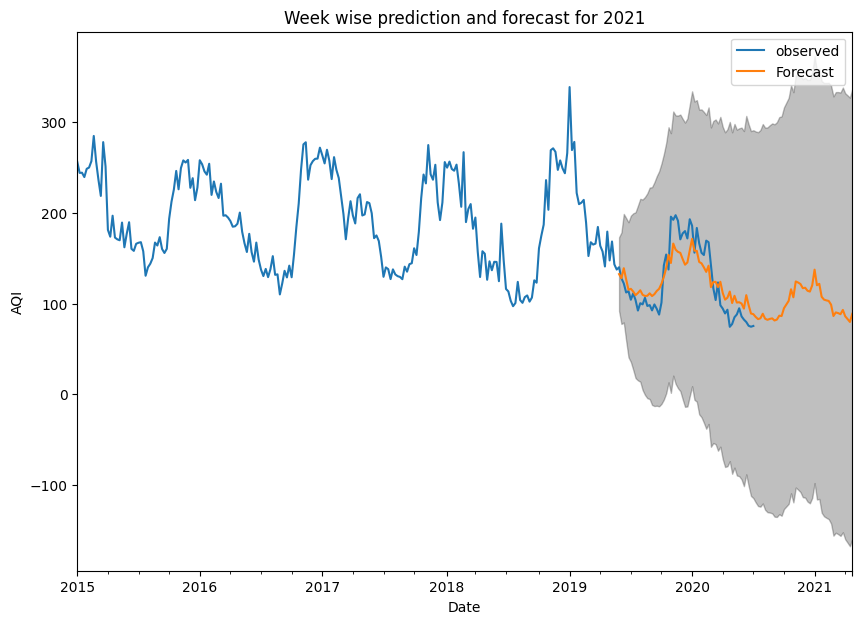

In [ ]:
## Forecast for valid set and Future

pred_uc_week = result_week.get_forecast(steps=100)
pred_ci = pred_uc_week.conf_int()
ax = week.AQI.plot(label='observed', figsize=(10, 7))
pred_uc_week.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Week wise prediction and forecast for 2021")
plt.legend()
plt.show()

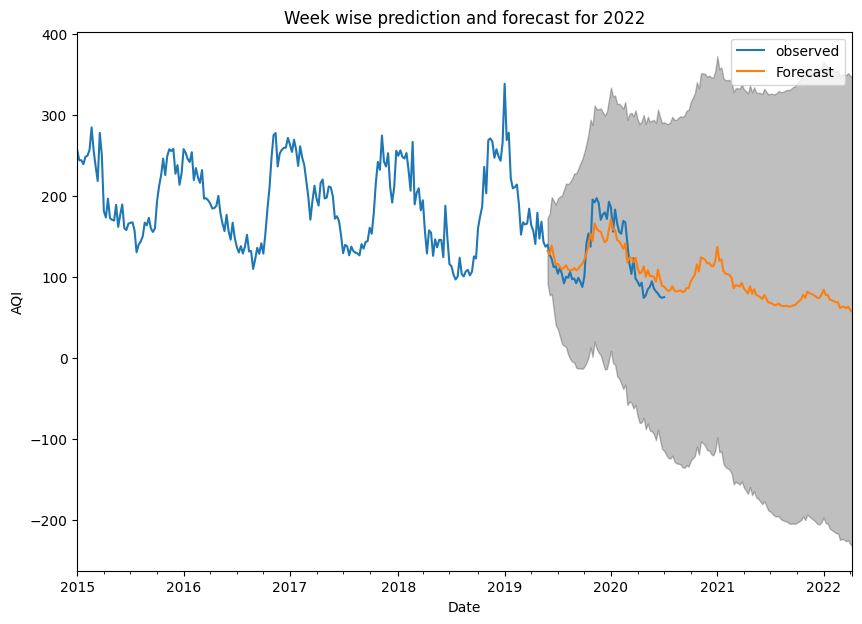

In [ ]:
# Forecast for valid set and future up to 2022
steps_to_2022 = 150  # Estimate the number of weeks in 2022
pred_uc_week = result_week.get_forecast(steps=steps_to_2022)  # Adjust the steps
pred_ci = pred_uc_week.conf_int()
ax = week.AQI.plot(label='observed', figsize=(10, 7))
pred_uc_week.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Week wise prediction and forecast for 2022")
plt.legend()
plt.show()


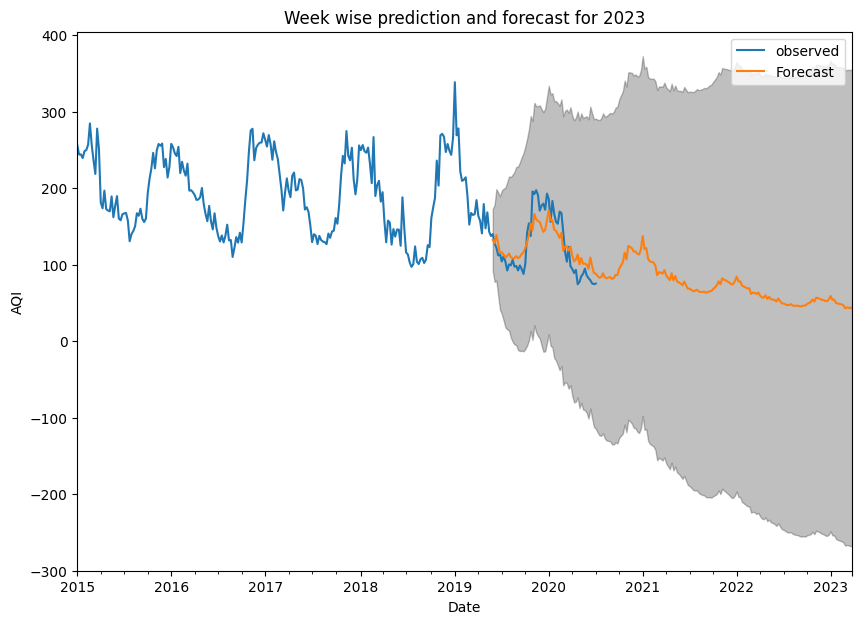

In [ ]:
# Forecast for valid set and future up to 2023
steps_to_2023 = 200  # Estimate the number of weeks in 2023
pred_uc_week = result_week.get_forecast(steps=steps_to_2023)  # Adjust the steps
pred_ci = pred_uc_week.conf_int()
ax = week.AQI.plot(label='observed', figsize=(10, 7))
pred_uc_week.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Week wise prediction and forecast for 2023")
plt.legend()
plt.show()


In [ ]:
# Calculate Accuracy Metrics

forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)

{'mape': 15.322338349809195,
 'rmse': 20.914303775072433,
 'mse': 437.4081023960091,
 'mae': 18.063274835061673,
 'r2': 0.7087299739573479}

**Vector Auto Regression (week wise)**

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fitting the VAR model
VAR_model_week=VAR(endog=train_week)
VAR_model_week_fit=VAR_model_week.fit()

# Predicting on Validation set
predict_week=VAR_model_week_fit.forecast(VAR_model_week_fit.endog,steps=len(valid_week))

pred_week=pd.DataFrame(predict_week,columns=df.columns,index=range(0,len(predict_week)))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
VAR_accuracy(pred_week, valid_week)

Metrics for PM2.5
RMSE: 29.74186560630485
MAPE: 79.8042095437602
MSE: 884.5785697434993
MAE: 24.96265382753213
R-squared (R2): -0.6715037154929766

Metrics for PM10
RMSE: 43.22325894272329
MAPE: 50.33683076180261
MSE: 1868.250113629709
MAE: 35.82230025536325
R-squared (R2): -1.2257749207770212

Metrics for NO
RMSE: 5.8378508946875955
MAPE: 35.07494723147961
MSE: 34.08050306860476
MAE: 5.028403277983247
R-squared (R2): -0.562111215633843

Metrics for NO2
RMSE: 8.413428251770435
MAPE: 38.23684917520317
MSE: 70.78577494768894
MAE: 6.573287555330933
R-squared (R2): -0.5024568999562016

Metrics for NOx
RMSE: 9.535680446094664
MAPE: 29.435105070470335
MSE: 90.92920157003213
MAE: 8.06067885243699
R-squared (R2): -0.022178393800542873

Metrics for NH3
RMSE: 6.440898331569186
MAPE: 31.163116005554116
MSE: 41.48517131761072
MAE: 5.44863933511998
R-squared (R2): -2.4249246733684884

Metrics for CO
RMSE: 2.144679666373678
MAPE: 174.90457569893243
MSE: 4.599650871356712
MAE: 1.8313985264462866
R-sq

**Comparative Analysis**

In [ ]:
results=pd.DataFrame(res,columns=["Model_Name","RMSE","MAPE","MAE","MSE","R-Square"])

In [ ]:
res=[["SARIMAX Month Wise",(forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['rmse']),forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['mape'],forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['mae'],forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['mse'],forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['r2']],
    ["VAR MONTH Wise",(VAR_AQI_RMSE(pred_month, valid_month)),VAR_AQI_MAPE(pred_month, valid_month),VAR_AQI_MAE(pred_month, valid_month),VAR_AQI_MSE(pred_month, valid_month),VAR_AQI_R2(pred_month, valid_month)],
["SARIMAX Week Wise",(forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['rmse']),forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['mape'],forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['mae'],forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['mse'],forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['r2']],
    ["VAR week Wise",(VAR_AQI_RMSE(pred_week, valid_week)),VAR_AQI_MAPE(pred_week, valid_week),VAR_AQI_MAE(pred_week, valid_week),VAR_AQI_MSE(pred_week, valid_week),VAR_AQI_R2(pred_week, valid_week)]]

In [ ]:
results

,Model_Name,RMSE,MAPE,MAE,MSE,R-Square
0,SARIMAX Month Wise,45.307098,38.366100,40.945958,2052.733123,-0.378890
1,VAR MONTH Wise,62.862111,55.323994,51.756733,3951.645030,-1.654453
2,SARIMAX Week Wise,20.914304,15.322338,18.063275,437.408102,0.708730
3,VAR week Wise,61.936899,52.768557,50.098649,3836.179519,-1.554512


In [ ]:
# Original R-squared values
r2_values = {
    'SARIMAX Month Wise': -0.378890,
    'VAR MONTH Wise': -1.654453,
    'SARIMAX Week Wise': 0.708730,
    'VAR week Wise': -1.554512
}

# Convert to positive R-squared values
positive_r2_values = {model: abs(r2) for model, r2 in r2_values.items()}

# Print the converted values
for model, r2 in positive_r2_values.items():
    print(f"{model}: {r2}")

SARIMAX Month Wise: 0.37889
VAR MONTH Wise: 1.654453
SARIMAX Week Wise: 0.70873
VAR week Wise: 1.554512


In [ ]:
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'Model_Name': ['SARIMAX Month Wise', 'VAR MONTH Wise', 'SARIMAX Week Wise', 'VAR week Wise'],
    'RMSE': [45.307098, 62.862111, 20.914304, 61.936899],
    'MAPE': [38.366100, 55.323994, 15.322338, 52.768557],
    'MAE': [40.945958, 51.756733, 18.063275, 50.098649],
    'MSE': [2052.733123, 3951.645030, 437.408102, 3836.179519],
    'R-Square': [-0.378890, -1.654453, 0.708730, -1.554512]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Divide all values (except R-squared values) by 100
columns_to_divide = ['RMSE', 'MAPE', 'MAE', 'MSE']
df[columns_to_divide] = df[columns_to_divide] / 100

# Take the absolute value of R-squared values
df['R-Square'] = abs(df['R-Square'])

# Print the modified DataFrame
print(df)


           Model_Name      RMSE      MAPE       MAE        MSE  R-Square
0  SARIMAX Month Wise  0.453071  0.383661  0.409460  20.527331  0.378890
1      VAR MONTH Wise  0.628621  0.553240  0.517567  39.516450  1.654453
2   SARIMAX Week Wise  0.209143  0.153223  0.180633   4.374081  0.708730
3       VAR week Wise  0.619369  0.527686  0.500986  38.361795  1.554512


In [ ]:
# Sample data (replace with your actual data)
data = {
    'Model_Name': ['SARIMAX Month Wise', 'VAR MONTH Wise', 'SARIMAX Week Wise', 'VAR week Wise'],
    'MSE': [20.527331, 39.516450, 4.374081, 38.361795]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Divide all values (except R-squared values) by 100
columns_to_divide = ['MSE']
df[columns_to_divide] = df[columns_to_divide] / 100

print(df)

           Model_Name       MSE
0  SARIMAX Month Wise  0.205273
1      VAR MONTH Wise  0.395164
2   SARIMAX Week Wise  0.043741
3       VAR week Wise  0.383618


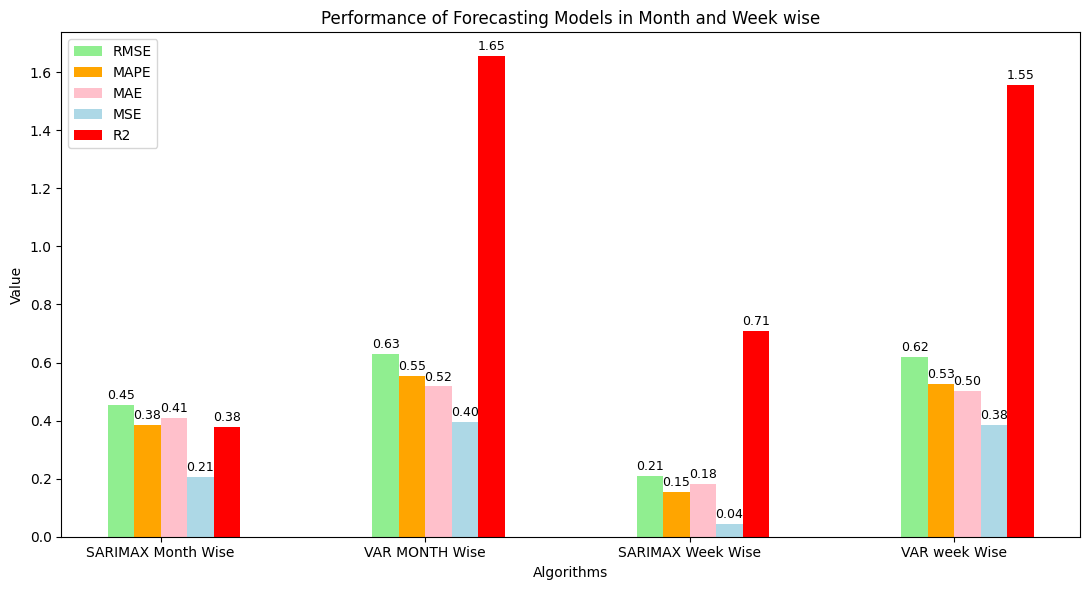

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "SARIMAX Week Wise", "VAR week Wise"]
rmse_values = [0.453071, 0.628621, 0.209143, 0.619369]
mape_values = [0.383661, 0.553240, 0.153223, 0.527686]
mae_values = [0.409460, 0.517567, 0.180633, 0.500986]
mse_values = [0.205273, 0.395164, 0.043741, 0.383618]
r2_values = [0.37889, 1.654453, 0.70873, 1.554512]

data = {
    'Model Names': model_names,
    'RMSE': rmse_values,
    'MAPE': mape_values,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
}

df = pd.DataFrame(data)

# Set the figure size and create a bar chart
plt.figure(figsize=(11, 6))

# Define the number of bars and their positions
num_bars = len(df)
bar_width = 0.10
index = np.arange(num_bars)

# Define colors for each metric
colors = {'RMSE': 'lightgreen', 'MAPE': 'orange', 'MAE': 'pink', 'MSE': 'lightblue','R2':'red',}

# Loop through each metric and plot it
for i, (metric, color) in enumerate(colors.items()):
    plt.bar(index + i * bar_width, df[metric], width=bar_width, label=metric, color=color)

# Customize the plot
plt.xlabel('Algorithms')
plt.ylabel('Value')
plt.title('Performance of Forecasting Models in Month and Week wise')
plt.xticks(index + bar_width * 1.5, df['Model Names'])
plt.legend(loc='best')

# Add data labels above each bar
for i, metric in enumerate(colors.keys()):
    for j, value in enumerate(df[metric]):
        plt.text(index[j] + i * bar_width, value + 0.01 , f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

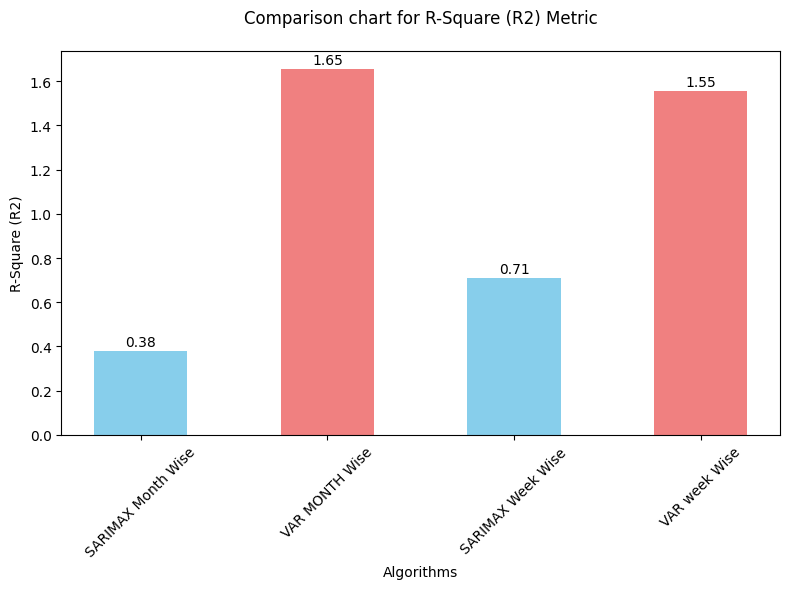

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "SARIMAX Week Wise", "VAR week Wise"]
r2_values = [0.37889, 1.654453, 0.70873, 1.554512]

# Create a bar chart for R-squared values with different colors
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_values, width=0.5, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])

plt.xlabel('Algorithms')
plt.ylabel('R-Square (R2)')

# Set the title with a thicker border (outline)
plt.title('Comparison chart for R-Square (R2) Metric', pad=20)

plt.xticks(rotation=45)
plt.tight_layout()

# Add R2 values above each bar
for bar, r2 in zip(plt.gca().get_children(), r2_values):
    if isinstance(bar, plt.Rectangle):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{r2:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


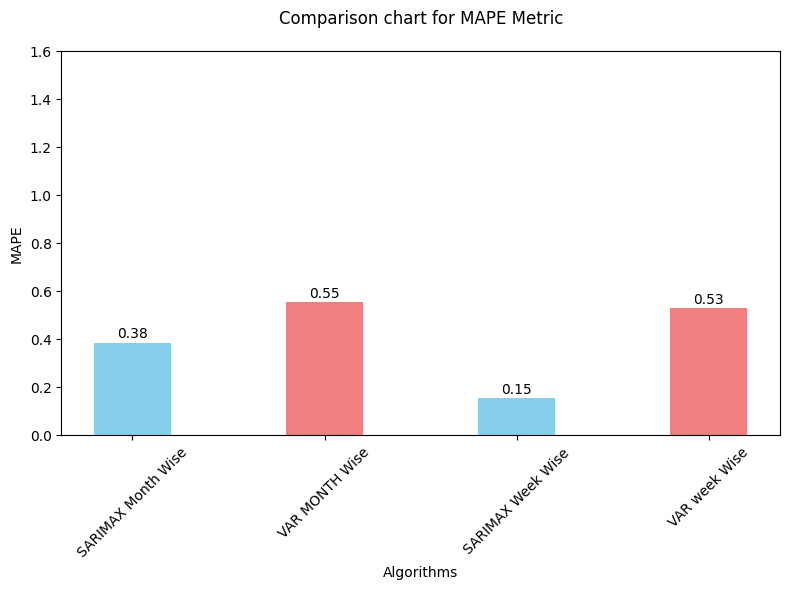

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "SARIMAX Week Wise", "VAR week Wise"]
mape_values = [0.383661, 0.553240, 0.153223, 0.527686]

# Create a list of colors for SARIMAX and VAR models
sarimax_color = 'skyblue'
var_color = 'lightcoral'

# Create a bar chart for MAPE values with different colors
plt.figure(figsize=(8, 6))
plt.bar(
    model_names,
    mape_values,
    color=[sarimax_color, var_color, sarimax_color, var_color],
    width=0.4,
)
plt.xlabel('Algorithms')
plt.ylabel('MAPE')

# Set the Y-axis scale limit up to 1.6
plt.ylim(0, 1.6)

# Set the title with a thicker border (outline)
title = plt.title('Comparison chart for MAPE Metric', pad=20)

plt.xticks(rotation=45)
plt.tight_layout()

# Add MAPE values above each bar
for bar, mape in zip(plt.gca().get_children(), mape_values):
    if isinstance(bar, plt.Rectangle):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            mape + 0.01,
            f'{mape:.2f}',
            ha='center',
            va='bottom',
        )

# Show the plot
plt.show()


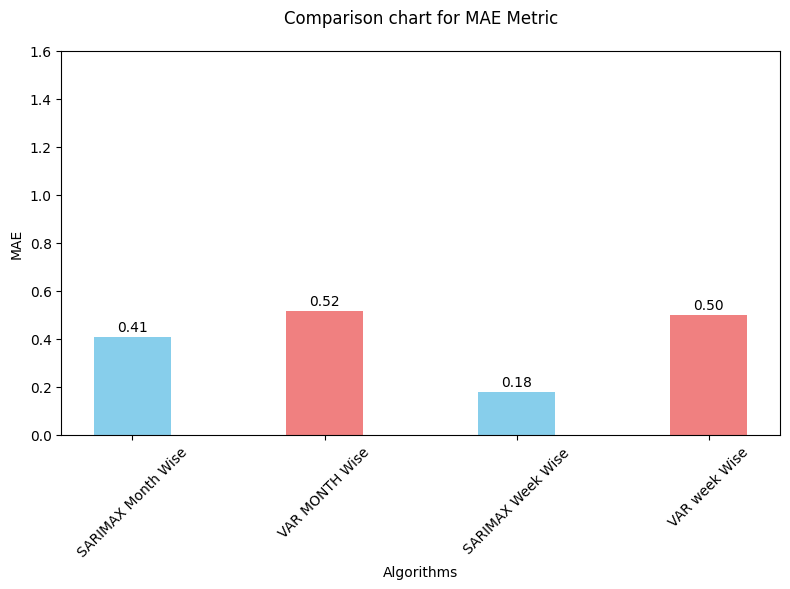

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "SARIMAX Week Wise", "VAR week Wise"]
mae_values = [0.409460, 0.517567, 0.180633, 0.500986]

# Create a list of colors for SARIMAX and VAR models
sarimax_color = 'skyblue'
var_color = 'lightcoral'

# Create a bar chart for MAE values with different colors
plt.figure(figsize=(8, 6))
plt.bar(model_names, mae_values, color=[sarimax_color, var_color, sarimax_color, var_color], width=0.4)
plt.xlabel('Algorithms')
plt.ylabel('MAE')

# Set the Y-axis scale limit up to 1.6
plt.ylim(0, 1.6)

# Set the title with a thicker border (outline)
title = plt.title('Comparison chart for MAE Metric', pad=20)

plt.xticks(rotation=45)
plt.tight_layout()

# Add MAE values above each bar
for bar, mae in zip(plt.gca().get_children(), mae_values):
    if isinstance(bar, plt.Rectangle):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            mae + 0.01,
            f'{mae:.2f}',
            ha='center',
            va='bottom',
        )

# Show the plot
plt.show()


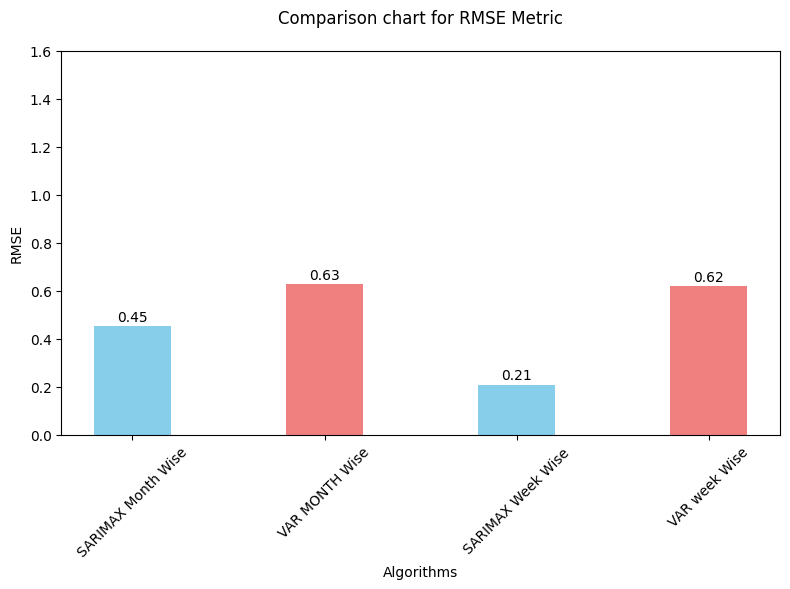

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "SARIMAX Week Wise", "VAR week Wise"]
rmse_values = [0.453071, 0.628621, 0.209143, 0.619369]

# Create a list of colors for SARIMAX and VAR models
sarimax_color = 'skyblue'
var_color = 'lightcoral'

# Create a bar chart for RMSE values with different colors
plt.figure(figsize=(8, 6))
plt.bar(
    model_names,
    rmse_values,
    color=[sarimax_color, var_color, sarimax_color, var_color],
    width=0.4,
)
plt.xlabel('Algorithms')
plt.ylabel('RMSE')

# Set the Y-axis scale limit up to 1.6
plt.ylim(0, 1.6)

# Set the title with a thicker border (outline)
title = plt.title('Comparison chart for RMSE Metric', pad=20)

plt.xticks(rotation=45)
plt.tight_layout()

# Add RMSE values above each bar
for bar, rmse in zip(plt.gca().get_children(), rmse_values):
    if isinstance(bar, plt.Rectangle):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            rmse + 0.01,
            f'{rmse:.2f}',
            ha='center',
            va='bottom',
        )

# Show the plot
plt.show()


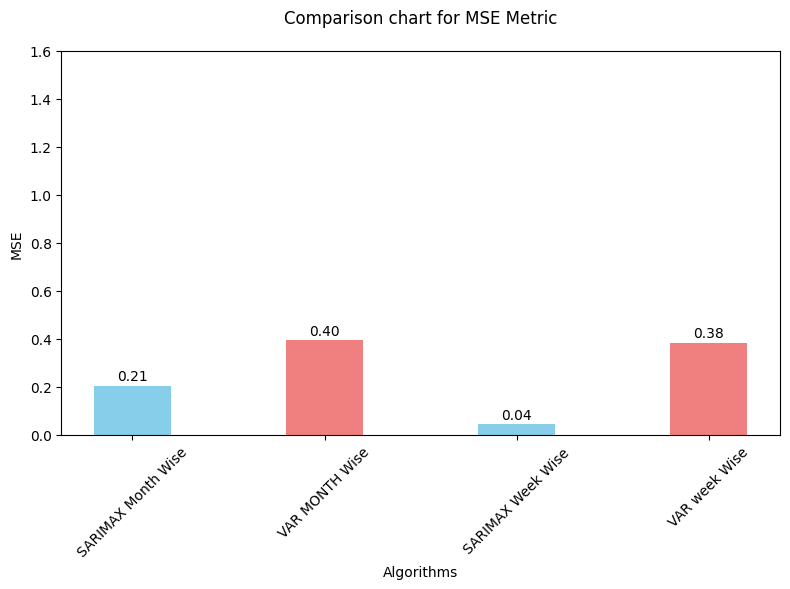

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
model_names = ["SARIMAX Month Wise", "VAR MONTH Wise", "SARIMAX Week Wise", "VAR week Wise"]
mse_values = [0.205273, 0.395164, 0.043741, 0.383618]

# Create a list of colors for SARIMAX and VAR models
sarimax_color = 'skyblue'
var_color = 'lightcoral'

# Create a bar chart for MSE values with different colors
plt.figure(figsize=(8, 6))
plt.bar(
    model_names,
    mse_values,
    color=[sarimax_color, var_color, sarimax_color, var_color],
    width=0.4,
)
plt.xlabel('Algorithms')
plt.ylabel('MSE')

# Set the Y-axis scale limit up to 1.6
plt.ylim(0, 1.6)

# Set the title with a thicker border (outline)
title = plt.title('Comparison chart for MSE Metric', pad=20)

plt.xticks(rotation=45)
plt.tight_layout()

# Add MSE values above each bar
for bar, mse in zip(plt.gca().get_children(), mse_values):
    if isinstance(bar, plt.Rectangle):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            mse + 0.01,
            f'{mse:.2f}',
            ha='center',
            va='bottom',
        )

# Show the plot
plt.show()


In [ ]:
pip install pmdarima